In [1]:
from pickle import load
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
import torch.nn as nn
from SK import SKModel
import re

from collections import defaultdict

In [2]:
PATH = './data'

# 读取数据和处理

In [3]:
# 定义处理数据的类
class dealdata():
    def __init__(self, PATH, save_path = None):
        self.PATH = PATH
        print(PATH)

        if save_path is None:
            self.save_path = PATH

        #寻找配置文件
        for file_name in os.listdir(PATH):
            result = re.search(r'n\d+D\d+\.pickle', file_name)
            if result:
                J_name = result.group()
                self.n = int(re.findall(r'\d+\.\d+|\d+', J_name)[0])


        self.model = SKModel(self.n)
        with open(os.path.join(PATH, J_name), 'rb') as f:
            self.model.J = load(f)
            self.model.J.requires_grad = False

        with open(os.path.join(PATH, 'beta.pickle'), 'rb') as f:
            self.beta_list = load(f)

        with open(os.path.join(PATH, 'S_list.pickle'), 'rb') as f:
            self.S_list = np.array(load(f))

        with open(os.path.join(PATH, 'GA_Energy.pickle'), 'rb') as f:
            self.GA_state = load(f)

        with open(os.path.join(PATH, 'SA_Energy.pickle'), 'rb') as f:
            self.SA_state = load(f)

        with open(os.path.join(PATH, 'PSO_Energy.pickle'), 'rb') as f:
            self.PSO_state = load(f)

        try:
            with open(os.path.join(PATH, 'Exact_Energy.pickle'), 'rb') as f:
                self.Exact_state = load(f)
        except: self.Exact_state = None

        with open(os.path.join(PATH, 'Energy.pickle'), 'rb') as f:
            self.energy_list = np.array(load(f))
        
        self.S_list = torch.from_numpy(self.S_list)


    def plot_Energy(self, save_path=None, title=None, start=0):
        #_, E_min = self.model.exact()
        try:
            with open(os.path.join(save_path, 'Exact_Energy.pickle'), 'rb') as f:
                E_min = load(f)["E_min"]
        except: return None

        exact_energy = [E_min] * len(self.beta_list)
        if 'Energy.pickle' in os.listdir(self.PATH):
            with open(os.path.join(self.PATH, 'Energy.pickle'), 'rb') as f:
                self.energy_list = np.array(load(f))
        else:
            self.energy_list = []
            for num, beta in enumerate(self.beta_list):
                self.model.beta = beta
                #print(self.model.energy(self.S_list[num]))
                self.energy_list.append(self.model.energy(self.S_list[num]).min()/self.n)
            self.energy_list = np.array(self.energy_list)

        # 提取每列的最大值和最小值
        energy_max = np.max(self.energy_list, axis=1)  # 沿着行方向（axis=0）找到最大值
        energy_min = np.min(self.energy_list, axis=1)  # 沿着行方向（axis=0）找到最小值
        #print(energy_max)

        if title is not None:
            plt.title(title)
        plt.plot(self.beta_list[start:], energy_min[start:], label='min')
        plt.plot(self.beta_list[start:], energy_max[start:], label='max')
        plt.plot(self.beta_list[start:], exact_energy[start:], label="exact")
        plt.legend()
        if save_path is None:
            plt.show()
        else:
            plt.savefig(os.path.join(save_path, title))
        plt.close()
        
        return None

    def plot_FreeEnergy(self, save_path=None, title=None, start=0):
        with open(os.path.join(self.PATH, 'freeenergy.pickle'), 'rb') as f:
            self.freeenergy_list = np.array(load(f)).mean(axis=1)
            print(self.freeenergy_list.shape, len(self.beta_list))
   
        exact_freeenergy_list = np.zeros(len(self.beta_list))
        for num, beta in enumerate(self.beta_list):
            self.model.beta = beta
            exact_freeenergy, _ = self.model.exact()
            exact_freeenergy_list[num] = exact_freeenergy

        if title is not None:
            plt.title(title)
        plt.plot(self.beta_list[start:], self.freeenergy_list[start:], label='mean')
        plt.plot(self.beta_list[start:], exact_freeenergy_list[start:], label="exact")
        plt.legend()
        if save_path is None:
            plt.show()
        else:
            plt.savefig(os.path.join(save_path, title))
        plt.close()
        
        return None


In [4]:
total_info = {"n":[], "min":[], "GA_min":[], "SA_min":[], "PSO_min":[], "max":[], "beta_list":[], "energy":[], "exact":[]}
for name in os.listdir(PATH):
    
    print(name)

    dealmodel = dealdata(os.path.join(PATH, name))
    #dealmodel.plot_Energy(os.path.join(PATH, name), "energy-beta")
    #dealmodel.plot_FreeEnergy(os.path.join(PATH, name), "Free_Energy-beta")

    total_info["n"].append(dealmodel.n)
    total_info["beta_list"].append(dealmodel.beta_list)
    total_info["min"].append(np.min(dealmodel.energy_list))
    total_info["max"].append(np.max(dealmodel.energy_list))
    total_info["energy"].append(dealmodel.energy_list)
    total_info["GA_min"].append(dealmodel.GA_state["E_min"])
    total_info["SA_min"].append(dealmodel.SA_state["E_min"])
    total_info["PSO_min"].append(dealmodel.PSO_state["E_min"])
    try:
        total_info["exact"].append(dealmodel.Exact_state["E_min"])
    except: total_info["exact"].append(np.nan)


2024-07-27_17-00-04
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-27_17-00-04
2024-07-27_17-00-21
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-27_17-00-21
2024-07-28_00-29-56
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-28_00-29-56
2024-07-28_01-42-09
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-28_01-42-09
2024-07-28_00-52-55
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-28_00-52-55
2024-07-28_10-02-49
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-28_10-02-49
2024-07-27_16-51-58
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-27_16-51-58
2024-07-28_10-51-47
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-28_10-51-47
2024-07-27_17-46-18
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-27_17-46-18
2024-07-28_00-01-14
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-28_00-01-14
2024-07-28_09-20-15
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-28_09-20-15
2024-07-27_21-57-44
/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-27_21-57-44
2024-07-27_19-50-42
/data/NoDetailMC/MCw

# 图片设置

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#-------------------- 配置Matplotlib参数以接近期刊风格 --------------------

# 使用LaTeX字体渲染，以接近期刊排版样式
#mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=14)
mpl.rc('text.latex', preamble=r'\usepackage{amsmath,amssymb}')

# 设置线条参数
mpl.rc('lines', linewidth=2, markeredgewidth=1)

# 坐标轴的细节设置
mpl.rc('axes', labelsize=16, titlesize=16, linewidth=1.5)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

# 坐标刻度向内（更接近APS风格）
mpl.rc('xtick', direction='in')
mpl.rc('ytick', direction='in')

# 去掉图例边框
mpl.rc('legend', frameon=False)

# 近似算法和VEN的对比

/tmp/ipykernel_2299/2938405986.py:25: RuntimeWarning: Mean of empty slice
  exact_means = np.array([np.nanmean(exact_values[n]) for n in n_values])  # 使用np.nanmean忽略NaN值
/tmp/ipykernel_2299/2938405986.py:63: RuntimeWarning: Mean of empty slice
  exact_means = np.array([np.nanmean(exact_values[n]) for n in n_values])  # 使用np.nanmean忽略NaN值


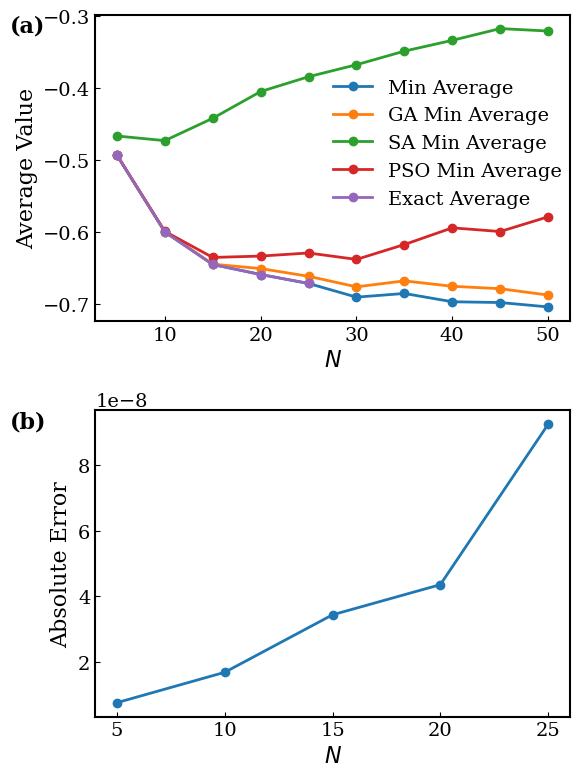

In [6]:
fig, ax = plt.subplots(2, figsize=(6, 8))

#-------------------- 绘图1 --------------------

# 使用默认字典来收集每个n的min、GA_min、SA_min、PSO_min和exact值
min_values = defaultdict(list)
GA_min_values = defaultdict(list)
SA_min_values = defaultdict(list)
PSO_min_values = defaultdict(list)
exact_values = defaultdict(list)

for n, min_val, GA_min_val, SA_min_val, PSO_min_val, exact_val in zip(total_info["n"], total_info["min"], total_info["GA_min"], total_info["SA_min"], total_info["PSO_min"], total_info["exact"]):
    min_values[n].append(min_val)
    GA_min_values[n].append(GA_min_val)
    SA_min_values[n].append(SA_min_val)
    PSO_min_values[n].append(PSO_min_val)
    exact_values[n].append(exact_val)

# 计算每个n的平均值
n_values = sorted(min_values.keys())
min_means = np.array([np.mean(min_values[n]) for n in n_values])
GA_min_means = [np.mean(GA_min_values[n]) for n in n_values]
SA_min_means = [np.mean(SA_min_values[n]) for n in n_values]
PSO_min_means = [np.mean(PSO_min_values[n]) for n in n_values]
exact_means = np.array([np.nanmean(exact_values[n]) for n in n_values])  # 使用np.nanmean忽略NaN值

# 创建折线图
ax[0].plot(n_values, min_means, label='Min Average', marker='o')
ax[0].plot(n_values, GA_min_means, label='GA Min Average', marker='o')
ax[0].plot(n_values, SA_min_means, label='SA Min Average', marker='o')
ax[0].plot(n_values, PSO_min_means, label='PSO Min Average', marker='o')
ax[0].plot(n_values, exact_means, label='Exact Average', marker='o')

# 添加标题和标签
#plt.title('Average Values by n')
ax[0].set_xlabel(r'$N$')
ax[0].set_ylabel(r'Average Value')
ax[0].legend(loc='right', bbox_to_anchor=(1.02, 0.58))

ax[0].text(-0.18, 1.00, '(a)', transform=ax[0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
#-------------------- 绘图2 --------------------

# 使用默认字典来收集每个n的min、GA_min、SA_min、PSO_min和exact值
min_values = defaultdict(list)
GA_min_values = defaultdict(list)
SA_min_values = defaultdict(list)
PSO_min_values = defaultdict(list)
exact_values = defaultdict(list)

for n, min_val, GA_min_val, SA_min_val, PSO_min_val, exact_val in zip(total_info["n"], total_info["min"], total_info["GA_min"], total_info["SA_min"], total_info["PSO_min"], total_info["exact"]):
    min_values[n].append(min_val)
    GA_min_values[n].append(GA_min_val)
    SA_min_values[n].append(SA_min_val)
    PSO_min_values[n].append(PSO_min_val)
    exact_values[n].append(exact_val)

# 计算每个n的平均值
n_values = sorted(min_values.keys())
min_means = np.array([np.mean(min_values[n]) for n in n_values])
GA_min_means = [np.mean(GA_min_values[n]) for n in n_values]
SA_min_means = [np.mean(SA_min_values[n]) for n in n_values]
PSO_min_means = [np.mean(PSO_min_values[n]) for n in n_values]
exact_means = np.array([np.nanmean(exact_values[n]) for n in n_values])  # 使用np.nanmean忽略NaN值

# 绘制绝对误差
ax[1].plot(n_values[:5], np.abs(exact_means[:5]-min_means[:5]), marker='o')
ax[1].set_xticks(np.arange(min(n_values), 30 , 5))

# 添加标题和标签
#plt.title('Average Values by n')
ax[1].set_xlabel(r'$N$')
ax[1].set_ylabel(r'Absolute Error')

ax[1].text(-0.18, 1.00, '(b)', transform=ax[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()

plt.savefig("./fig3.pdf", dpi=600) 
#plt.close()

# VEN能量变化的过程

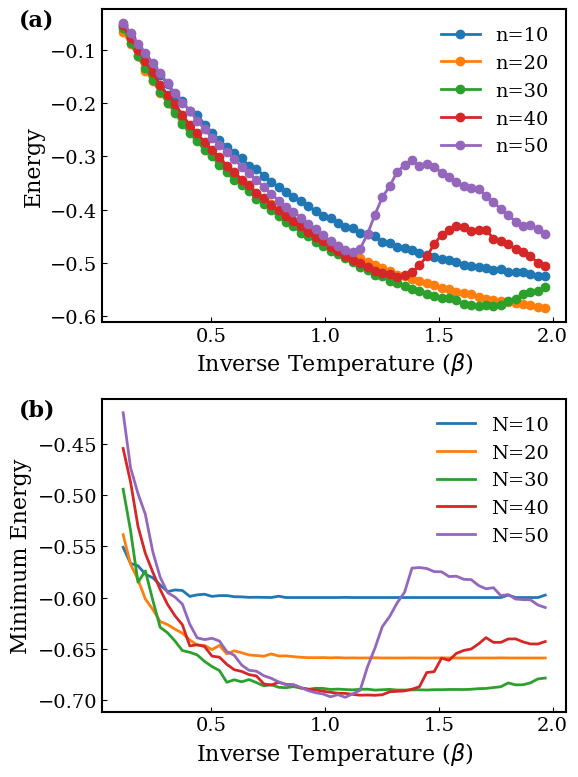

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 初始化图形
fig, ax = plt.subplots(2, figsize=(6, 8))

#-------------------- 绘图1 --------------------
# 创建一个字典来存储每个n对应的数据
grouped_data = {}
for i, n in enumerate(total_info["n"]):
    if n not in grouped_data:
        grouped_data[n] = {'beta_list': [], 'energy': []}
    grouped_data[n]['beta_list'].append(total_info["beta_list"][i])
    grouped_data[n]['energy'].append(total_info["energy"][i])

# 定义您希望的 n 值顺序
n_values = [10, 20, 30, 40, 50]

# 遍历每个 n，按照指定顺序
for n in n_values:
    if n not in grouped_data:
        continue  # 如果 n 不在数据中，跳过

    data = grouped_data[n]

    beta_list = np.array(data['beta_list'])
    energy = np.array(data['energy'])

    # 使用一个字典来存储每个 beta 对应的 energy 值
    beta_energy_dict = {}
    for i in range(len(beta_list)):
        for j in range(len(beta_list[i])):
            beta = beta_list[i][j]
            if beta not in beta_energy_dict:
                beta_energy_dict[beta] = []
            beta_energy_dict[beta].append(energy[i][j])

    # 计算每个 beta 对应的平均 energy、最小值和最大值的平均
    sorted_betas = sorted(beta_energy_dict.keys())
    mean_energy = []
    min_energy = []
    max_energy = []
    for beta in sorted_betas:
        energies = beta_energy_dict[beta]
        mean_energy.append(np.mean([np.mean(e) for e in energies]))
        min_energy.append(np.mean([np.min(e) for e in energies]))
        max_energy.append(np.mean([np.max(e) for e in energies]))

    # 计算百分比误差
    mean_energy = np.array(mean_energy)
    min_energy = np.array(min_energy)
    max_energy = np.array(max_energy)
    lower_error = (mean_energy - min_energy) / np.abs(mean_energy)
    upper_error = (max_energy - mean_energy) / np.abs(mean_energy)

    # 调整误差的比例（根据您的需要）
    normal_lower_error = lower_error * 0.02
    normal_upper_error = upper_error * 0.02

    start_index = 2
    end_index = None
    # 画出每条线，确保标签按照指定顺序添加
    ax[0].errorbar(sorted_betas[start_index:end_index], mean_energy[start_index:end_index],
                label=f'n={n}', fmt='-o')

# 添加标签和图例
ax[0].set_xlabel(r"Inverse Temperature ($\beta$)")
ax[0].set_ylabel(r'Energy')

ax[0].legend(loc='upper right')

ax[0].text(-0.18, 1.00, '(a)', transform=ax[0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
#-------------------- 绘图2 --------------------
# 创建一个字典来存储每个n对应的数据
grouped_data = {}
for i, n in enumerate(total_info["n"]):
    if n not in grouped_data:
        grouped_data[n] = {'beta_list': [], 'energy': []}
    grouped_data[n]['beta_list'].append(total_info["beta_list"][i])
    grouped_data[n]['energy'].append(total_info["energy"][i])

# 定义您希望的 n 值顺序
n_values = [10, 20, 30, 40, 50]
# 遍历每个 n，按照指定顺序
for n in n_values:
    if n not in grouped_data:
        continue  # 如果 n 不在数据中，跳过

    data = grouped_data[n]

    beta_list = np.array(data['beta_list'])
    energy = np.array(data['energy'])
    
    # 使用一个字典来存储每个beta对应的energy值
    beta_energy_dict = {}
    for i in range(len(beta_list)):
        for j in range(len(beta_list[i])):
            beta = beta_list[i][j]
            if beta not in beta_energy_dict:
                beta_energy_dict[beta] = []
            beta_energy_dict[beta].append(energy[i][j])
    
    # 计算每个beta对应的平均energy、最小值和最大值的平均
    sorted_betas = sorted(beta_energy_dict.keys())
    mean_energy = []
    min_energy = []
    max_energy = []
    for beta in sorted_betas:
        energies = beta_energy_dict[beta]
        mean_energy.append(np.mean([np.mean(e) for e in energies]))
        min_energy.append(np.mean([np.min(e) for e in energies]))
        max_energy.append(np.mean([np.max(e) for e in energies]))
    
    start_index = 2
    end_index = None
    # 画出每条线
    ax[1].plot(sorted_betas[start_index:end_index], min_energy[start_index:end_index], label=f'N={n}')
    
# 添加标签和图例
ax[1].set_xlabel(r"Inverse Temperature ($\beta$)")
ax[1].set_ylabel(r"Minimum Energy")
ax[1].legend()

ax[1].text(-0.18, 1.00, '(b)', transform=ax[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()

plt.savefig("./fig4.pdf", dpi=600) 
plt.show()
#plt.close()


# 能量示意图

In [12]:
from tqdm import trange
import pickle

name = '2024-07-27_17-29-55'
dealmodel = dealdata(os.path.join(PATH, name))
print(dealmodel.n)

# 计算总数
total = np.pow(2, dealmodel.n)
energies = np.zeros(total)
weights = np.zeros([total, dealmodel.n])

# 遍历所有构型
for d in trange(total):

    # 构造构型
    S = np.binary_repr(d, width=dealmodel.n)
    S = np.array(list(S)).astype(np.float32)
    S[S < 0.5] = -1
    S = torch.from_numpy(S).view(1, -1).to(torch.float64)

    # 计算能量值
    energy = dealmodel.model.energy(S)
    energies[d] = energy

    # 将构型保存
    weights[d] = S.numpy()

# 保存到文件
with open(f"./data/{name}_energies_weights.pkl", "wb") as file:
    pickle.dump({"energies": energies, "weights": weights}, file)


/data/NoDetailMC/MCwithVAN_SK/result_13/2024-07-27_17-29-55
15


  2%|▏         | 780/32768 [00:00<00:04, 7798.32it/s]

100%|██████████| 32768/32768 [00:03<00:00, 10043.41it/s]


In [13]:
# 读取代码
with open(f"./data/{name}_energies_weights.pkl", "rb") as file:
    data = pickle.load(file)
    energies = data["energies"]
    weights = data["weights"]

In [14]:
total_min = np.min(dealmodel.energy_list)
total_slist = dealmodel.S_list
way_s = []
for i, energy in enumerate(dealmodel.energy_list):
    if np.min(energy)-total_min == 0: break
    record = np.argmin(energy)
    way_s.append(total_slist[i][record][0].cpu().numpy())
way_s = np.array(way_s)

# 寻找 way_s 中每个向量在 weights 中的位置
indices = []
for vec in way_s:
    index = np.where((weights == vec).all(axis=1))[0]
    if index.size > 0:
        indices.append(index[0])
    else:
        indices.append(None)  # 如果未找到，返回 None

indices = np.array(indices)

<Figure size 640x480 with 0 Axes>

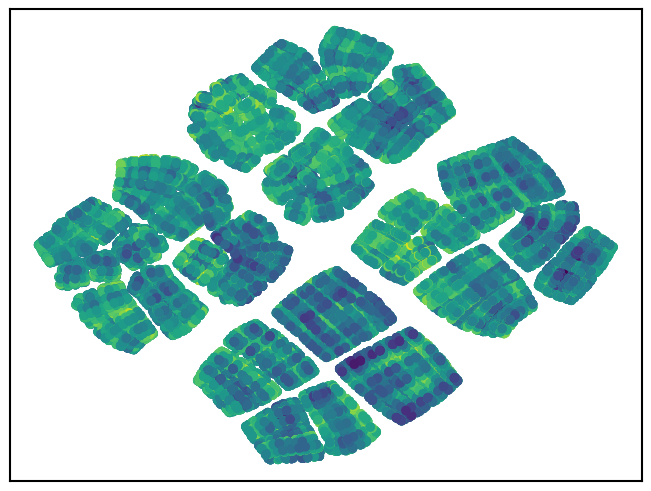

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.interpolate import RBFInterpolator

# ==========================
# 1. 数据准备
# ==========================



# ==========================
# 2. t-SNE 映射
# ==========================

# 使用 t-SNE 将 weights 映射到二维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(weights)

# ==========================
# 3. 创建插值网格
# ==========================

# 定义网格范围
min_x = int(min(X_tsne[:, 0]))
max_x = int(max(X_tsne[:, 0]))
min_y = int(min(X_tsne[:, 1]))
max_y = int(max(X_tsne[:, 1]))
N_sparse = 200  # 网格密度

# 创建网格
x_sparse, y_sparse = np.meshgrid(
    np.linspace(min_x, max_x, N_sparse),
    np.linspace(min_y, max_y, N_sparse)
)

# 将网格点重构为坐标列表
x_list = x_sparse.reshape(-1)
y_list = y_sparse.reshape(-1)
z_list = np.array([x_list, y_list]).transpose()

# ==========================
# 4. RBF 插值
# ==========================

# 使用 RBFInterpolator 进行插值
func = RBFInterpolator(X_tsne, energies, neighbors=100, smoothing=30, kernel='linear')
z_result = func(z_list)

# 将插值结果还原为二维
xx = x_list.reshape(N_sparse, N_sparse)
yy = y_list.reshape(N_sparse, N_sparse)
zz = z_result.reshape(N_sparse, N_sparse)


plt.clf()
plt.figure(constrained_layout=True)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=energies)
plt.xticks([])
plt.yticks([])
plt.show()

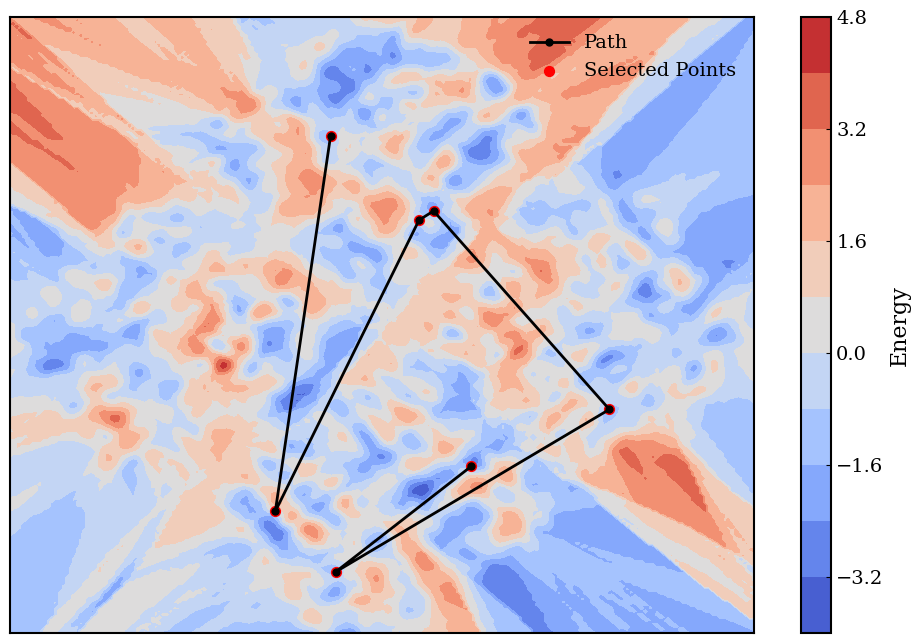

In [16]:
# ==========================
# 5. 可视化：等高线图 + 路径
# ==========================

# 绘制等高线图
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, zz, 11, cmap='coolwarm')
plt.colorbar(label='Energy')
plt.xticks([])
plt.yticks([])

# ==========================
# 6. 绘制路径
# ==========================

# 从 weights 中选择一些点作为路径
selected_indices = indices
selected_points = X_tsne[selected_indices]

# 绘制路径
plt.plot(
    selected_points[:, 0],
    selected_points[:, 1],
    marker='o',
    linestyle='-',
    color='black',
    linewidth=2,
    markersize=5,
    label='Path'
)

# 标记路径点
plt.scatter(
    selected_points[:, 0],
    selected_points[:, 1],
    color='red',
    s=50,
    label='Selected Points'
)

# 添加图例和标题
plt.legend()
#plt.title('t-SNE Mapping with RBF Interpolation and Path')
plt.savefig(f'./landscape/{name}_path.pdf', dpi=300)
plt.show()

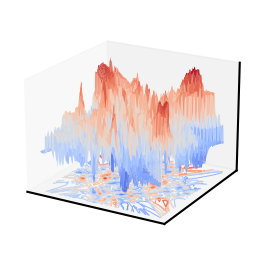

In [115]:
fig=plt.figure(figsize=(3,2.5), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx,yy,zz,cmap='coolwarm') 
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.contour(xx, yy, zz, 12, linewidths=0.7, zdir='z', offset=ax.get_zlim()[0], cmap='coolwarm')
ax.view_init(elev=20, azim=-60)
plt.savefig(f'./landscape/{name}_3D.pdf', dpi=600)

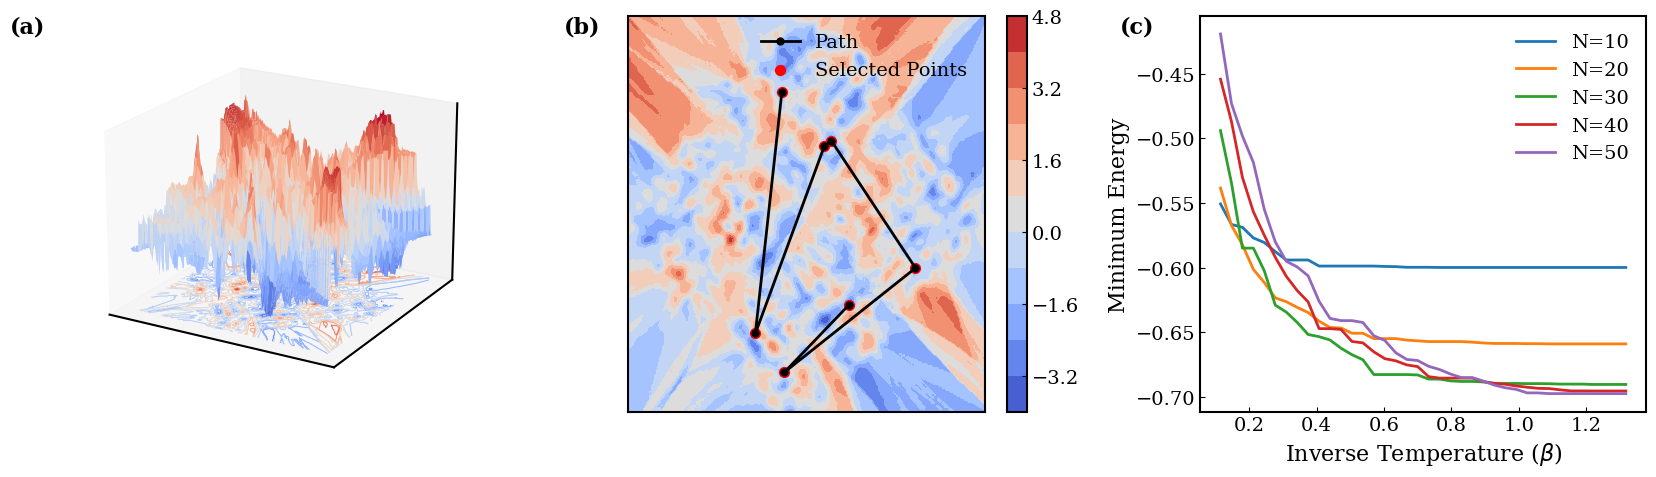

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 初始化图形
fig = plt.figure(figsize=(17, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 调整 ax2 的位置（左、下、宽、高）
#pos = ax2.get_position()  # 获取当前子图位置
#ax2.set_position([pos.x0 - 1.80, pos.y0, pos.width, pos.height])  # 左移子图 0.05 单位

# 调整 ax1 的比例（左、下、宽、高）
#pos1 = ax1.get_position()  # 获取当前子图位置
#ax1.set_position([pos1.x0, pos1.y0-0.2, pos1.width*1.1, pos1.height*1.1])  # 放大图片

# ==========================
# 子图 1：3D 图像
# ==========================
ax1.plot_surface(xx, yy, zz, cmap='coolwarm', edgecolor='none')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])

# 添加等高线（在底面）
ax1.contour(xx, yy, zz, 12, linewidths=0.7, zdir='z', offset=np.min(zz), cmap='coolwarm')

# 设置视角
ax1.text2D(-0.18, 1.00, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax1.view_init(elev=20, azim=-60)

# ==========================
# 子图 2：2D 等高线图
# ==========================
contour = ax2.contourf(xx, yy, zz, 12, cmap='coolwarm')
ax2.set_xticks([])
ax2.set_yticks([])

plt.colorbar(contour, ax=ax2)

# 从 weights 中选择一些点作为路径
selected_indices = indices
selected_points = X_tsne[selected_indices]

# 绘制路径
ax2.plot(
    selected_points[:, 0],
    selected_points[:, 1],
    marker='o',
    linestyle='-',
    color='black',
    linewidth=2,
    markersize=5,
    label='Path'
)

# 标记路径点
ax2.scatter(
    selected_points[:, 0],
    selected_points[:, 1],
    color='red',
    s=50,
    label='Selected Points'
)

# 添加图例和标题
ax2.legend()
ax2.text(-0.18, 1.00, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

# ==========================
# 子图 3：2D 表面映射图
# ==========================
# 创建一个字典来存储每个n对应的数据
grouped_data = {}
for i, n in enumerate(total_info["n"]):
    if n not in grouped_data:
        grouped_data[n] = {'beta_list': [], 'energy': []}
    grouped_data[n]['beta_list'].append(total_info["beta_list"][i])
    grouped_data[n]['energy'].append(total_info["energy"][i])

# 定义您希望的 n 值顺序
n_values = [10, 20, 30, 40, 50]
# 遍历每个 n，按照指定顺序
for n in n_values:
    if n not in grouped_data:
        continue  # 如果 n 不在数据中，跳过

    data = grouped_data[n]

    beta_list = np.array(data['beta_list'])
    energy = np.array(data['energy'])
    
    # 使用一个字典来存储每个beta对应的energy值
    beta_energy_dict = {}
    for i in range(len(beta_list)):
        for j in range(len(beta_list[i])):
            beta = beta_list[i][j]
            if beta not in beta_energy_dict:
                beta_energy_dict[beta] = []
            beta_energy_dict[beta].append(energy[i][j])
    
    # 计算每个beta对应的平均energy、最小值和最大值的平均
    sorted_betas = sorted(beta_energy_dict.keys())
    mean_energy = []
    min_energy = []
    max_energy = []
    for beta in sorted_betas:
        energies = beta_energy_dict[beta]
        mean_energy.append(np.mean([np.mean(e) for e in energies]))
        min_energy.append(np.mean([np.min(e) for e in energies]))
        max_energy.append(np.mean([np.max(e) for e in energies]))
    
    start_index = 2
    end_index = 40

    for i in range(1, len(min_energy)):
        min_energy[i] = min(min_energy[i], min_energy[i-1])

    # 画出每条线
    ax3.plot(sorted_betas[start_index:end_index], min_energy[start_index:end_index], label=f'N={n}')
# 添加标签和图例
ax3.set_xlabel(r"Inverse Temperature ($\beta$)")
ax3.set_ylabel(r"Minimum Energy")
ax3.legend()

ax3.text(-0.18, 1.00, '(c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
# ==========================
# 布局调整和显示
# ==========================
plt.tight_layout()
plt.savefig(f'./landscape/fig4_{name}.pdf', dpi=600)
plt.show()
